<a href="https://colab.research.google.com/github/keithvtls/Wind-Power-Generation-Data-Forecasting/blob/main/Wind_Power_Generation_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1>Wind Power Generation Data

<H2> Data Science Pre-Interview Assessment

Coded and Submitted by:

The Philippines is scaling up wind projects in Ilocos Norte, Guimaras, and offshore in Northern Luzon. These plants participate in the Wholesale Electricity Spot Market (WESM), where generation must be scheduled day-ahead but imbalance penalties apply if actual output diverges from bids. Short-term (hour-ahead) forecasts support grid balancing with NGCP (National Grid Corporation of the Philippines), while day-ahead forecasts are crucial for market bidding and hedging strategies. Forecast errors can translate into significant financial losses due to WESM imbalance settlement, especially during high demand peaks.

Using this dataset from Kaggle: https://www.kaggle.com/datasets/mubashirrahim/wind-power-generation-data-forecasting/

Assume that each location is situated in Illocos Norte.

Predict Power using weather features by developing an hour-ahead and day-ahead models and compare.
<ul>
<li>Create an Exploratory Data Analysis. You are free to solve the guide questions but is also free to include additional items.</li>

<li>Guide Questions:</li>
<ul>
<li>Does the distribution of Power look normal, skewed, or multi-modal? What might this suggest about wind resource conditions?</li>
<li>Do certain months have higher output?
Which variables are most predictive of Power? Why?</li>
<li>Estimate how many MWh may have been “lost” in such anomalous periods.</li>
</ul>
<li>Build a forecasting model using historical values and optional exogenous variables, as well as your previous findings from the EDA
<li>Evaluate model performance on a held‑out test set.</li>
<li>Visualize forecast errors and discuss financial implications.</li>
</ul>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
location1_dataset = 'https://github.com/keithvtls/Wind-Power-Generation-Data-Forecasting/blob/main/dataset/Location1.csv'
location2_dataset = 'https://github.com/keithvtls/Wind-Power-Generation-Data-Forecasting/blob/main/dataset/Location2.csv'
location3_dataset = 'https://github.com/keithvtls/Wind-Power-Generation-Data-Forecasting/blob/main/dataset/Location3.csv'
location4_dataset = 'https://github.com/keithvtls/Wind-Power-Generation-Data-Forecasting/blob/main/dataset/Location4.csv'

In [4]:
location1_dataset_url = 'https://raw.githubusercontent.com/keithvtls/Wind-Power-Generation-Data-Forecasting/main/dataset/Location1.csv'
location2_dataset_url = 'https://raw.githubusercontent.com/keithvtls/Wind-Power-Generation-Data-Forecasting/main/dataset/Location2.csv'
location3_dataset_url = 'https://raw.githubusercontent.com/keithvtls/Wind-Power-Generation-Data-Forecasting/main/dataset/Location3.csv'
location4_dataset_url = 'https://raw.githubusercontent.com/keithvtls/Wind-Power-Generation-Data-Forecasting/main/dataset/Location4.csv'

location1_dataset = pd.read_csv(location1_dataset_url)
location2_dataset = pd.read_csv(location2_dataset_url)
location3_dataset = pd.read_csv(location3_dataset_url)
location4_dataset = pd.read_csv(location4_dataset_url)

print("Location 1 Dataset Head:")
display(location1_dataset.head())
print("\nLocation 2 Dataset Head:")
display(location2_dataset.head())
print("\nLocation 3 Dataset Head:")
display(location3_dataset.head())
print("\nLocation 4 Dataset Head:")
display(location4_dataset.head())

Location 1 Dataset Head:


,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793



Location 2 Dataset Head:


,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,14.5,91,12.4,6.37,9.58,68,72,9.9,0.2574
1,2017-01-02 01:00:00,14.5,92,12.7,6.46,9.23,68,72,9.5,0.2535
2,2017-01-02 02:00:00,14.7,92,12.7,6.18,9.27,67,74,9.4,0.2497
3,2017-01-02 03:00:00,14.7,92,12.8,5.91,9.08,62,69,9.1,0.2458
4,2017-01-02 04:00:00,14.8,92,12.9,5.88,8.72,58,65,8.7,0.2419



Location 3 Dataset Head:


,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,29.7,55,15.4,4.96,8.46,124,129,8.8,0.3438
1,2017-01-02 01:00:00,29.6,56,15.6,4.97,8.43,120,124,8.5,0.3954
2,2017-01-02 02:00:00,29.8,56,16.1,5.69,9.18,121,123,9.7,0.4471
3,2017-01-02 03:00:00,29.8,58,16.8,5.49,8.88,123,126,9.9,0.4988
4,2017-01-02 04:00:00,30.2,59,17.8,5.19,8.36,124,127,9.4,0.5504



Location 4 Dataset Head:


,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,22.7,82,18.0,3.21,7.60,86,90,5.3,0.3047
1,2017-01-02 01:00:00,22.0,82,17.4,3.40,7.92,88,94,5.7,0.3516
2,2017-01-02 02:00:00,21.7,82,17.1,3.81,8.41,87,93,6.4,0.3985
3,2017-01-02 03:00:00,21.7,85,17.8,3.70,8.26,90,97,6.4,0.4454
4,2017-01-02 04:00:00,22.4,88,19.5,3.85,8.50,81,91,6.6,0.4922


In [5]:
location1_dataset.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,47.862911,72.288744,38.569308,3.591147,6.284431,203.637329,203.343676,7.771795,0.405385
std,19.453691,16.852287,18.772110,1.649318,2.685216,96.371262,97.959852,3.569147,0.288322
min,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,32.100000,60.000000,24.300000,2.410000,4.380000,132.000000,130.000000,5.000000,0.148900
50%,47.300000,74.000000,38.100000,3.300000,6.080000,225.000000,226.000000,7.200000,0.347650
75%,64.500000,86.000000,54.700000,4.590000,7.990000,277.000000,278.000000,10.000000,0.659600
max,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,29.200000,0.991300


In [6]:
location2_dataset.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,42.725605,69.085091,32.215932,4.693236,7.572439,208.512626,206.555594,8.557470,0.249902
std,23.724354,17.317481,21.307625,2.238572,3.381060,103.088845,104.882857,3.710385,0.209088
min,-31.200000,16.000000,-36.200000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,26.100000,56.000000,18.600000,3.010000,5.110000,135.000000,129.000000,5.800000,0.076200
50%,42.700000,71.000000,32.000000,4.440000,7.400000,224.000000,218.000000,8.200000,0.194950
75%,63.000000,83.000000,50.600000,6.040000,9.740000,300.000000,302.000000,10.800000,0.381800
max,95.400000,100.000000,76.600000,18.270000,24.590000,360.000000,360.000000,29.000000,0.985900


In [7]:
location3_dataset.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,49.225632,68.290708,38.225450,4.334103,7.047603,194.807100,194.897055,8.134600,0.307503
std,22.551070,17.865965,21.901316,2.061304,3.041665,101.823583,102.132837,3.661115,0.263879
min,-26.700000,12.000000,-35.500000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000
25%,32.000000,55.000000,22.800000,2.730000,4.880000,125.000000,126.000000,5.400000,0.077000
50%,50.300000,70.000000,38.100000,4.050000,6.920000,191.000000,193.000000,7.700000,0.240700
75%,68.400000,83.000000,57.900000,5.600000,8.990000,289.000000,289.000000,10.400000,0.498400
max,101.700000,100.000000,78.700000,18.530000,24.200000,360.000000,360.000000,26.600000,0.999400


In [8]:
location4_dataset.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,46.809829,70.956621,37.054274,4.012071,6.612864,199.400731,201.359954,7.688954,0.250926
std,21.561586,16.969744,20.995804,1.887665,2.869876,96.575068,97.207775,3.458954,0.228814
min,-28.800000,9.000000,-35.600000,0.000000,0.000000,1.000000,1.000000,0.500000,0.000000
25%,30.300000,59.000000,21.900000,2.550000,4.580000,129.000000,130.000000,5.000000,0.066700
50%,47.100000,73.000000,37.100000,3.750000,6.500000,207.000000,211.000000,7.300000,0.184700
75%,65.400000,85.000000,55.300000,5.210000,8.440000,284.000000,286.000000,9.900000,0.371825
max,93.800000,100.000000,77.900000,14.260000,21.750000,360.000000,360.000000,26.400000,0.988800


In [9]:
location1_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [10]:
location2_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [11]:
location3_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [12]:
location4_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [31]:
# Dataset URLs
urls = {
    "Location1": "https://raw.githubusercontent.com/keithvtls/Wind-Power-Generation-Data-Forecasting/main/dataset/Location1.csv",
    "Location2": "https://raw.githubusercontent.com/keithvtls/Wind-Power-Generation-Data-Forecasting/main/dataset/Location2.csv",
    "Location3": "https://raw.githubusercontent.com/keithvtls/Wind-Power-Generation-Data-Forecasting/main/dataset/Location3.csv",
    "Location4": "https://raw.githubusercontent.com/keithvtls/Wind-Power-Generation-Data-Forecasting/main/dataset/Location4.csv"
}

In [32]:
for name, url in urls.items():
    print(f"\n=== {name} ===")

    # Load dataset
    df = pd.read_csv(url)
    df['Time'] = pd.to_datetime(df['Time'])
    df = df.set_index('Time')


=== Location1 ===

=== Location2 ===

=== Location3 ===

=== Location4 ===


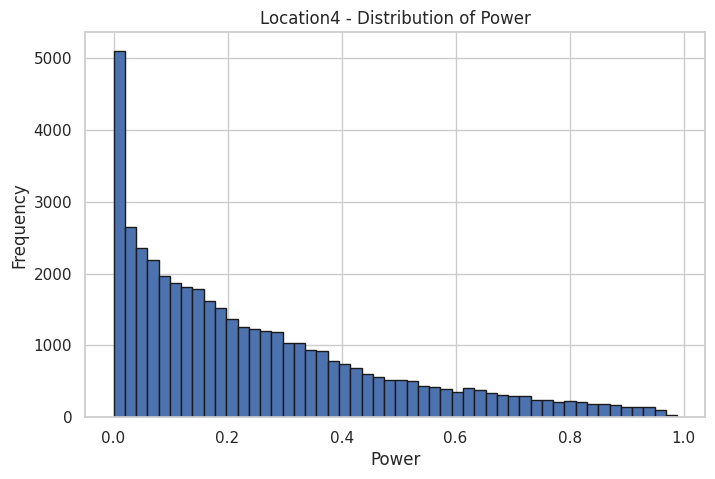

In [33]:
    # 1. Distribution of Power
    plt.figure(figsize=(8,5))
    df['Power'].hist(bins=50, edgecolor='k')
    plt.title(f"{name} - Distribution of Power")
    plt.xlabel("Power")
    plt.ylabel("Frequency")
    plt.show()

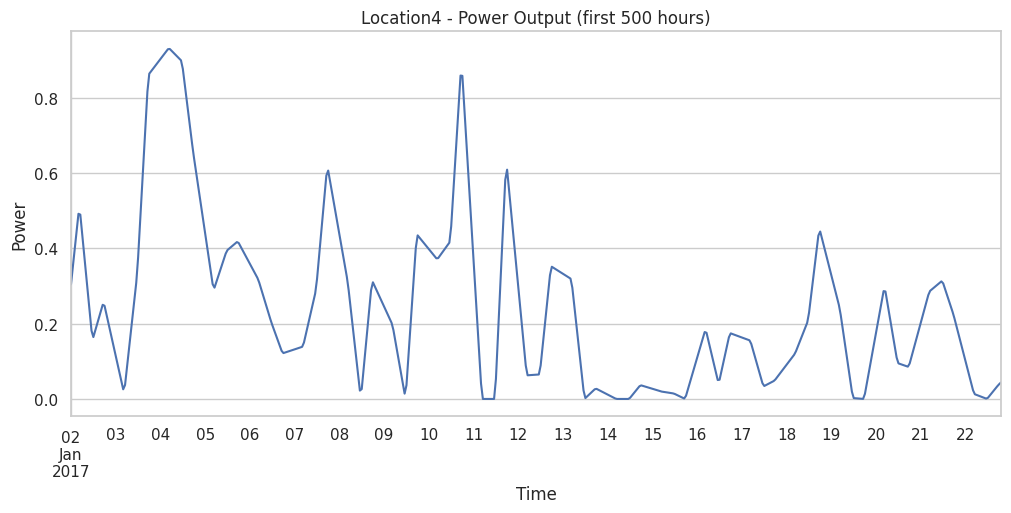

In [34]:
    # 2. Power Time Series (first 500 hours)
    plt.figure(figsize=(12,5))
    df['Power'].iloc[:500].plot()
    plt.title(f"{name} - Power Output (first 500 hours)")
    plt.ylabel("Power")
    plt.xlabel("Time")
    plt.show()

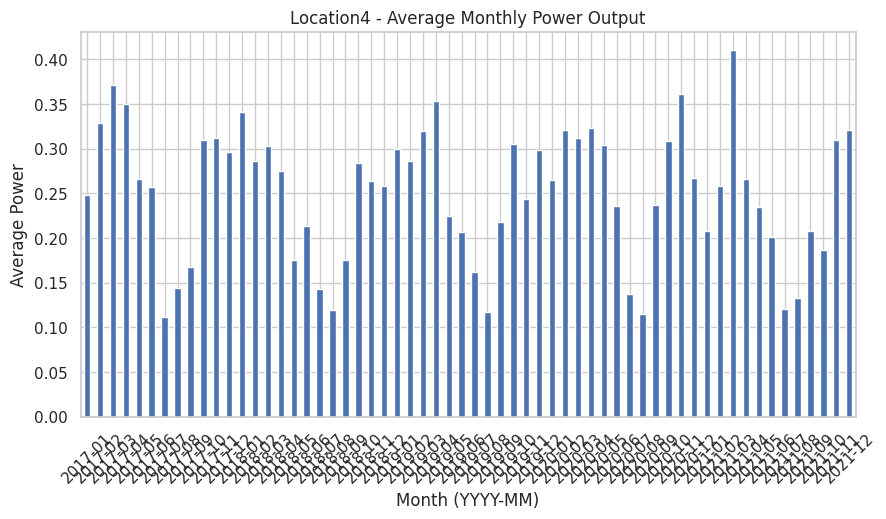

In [38]:
# 3. Monthly Average Power
monthly_avg = df['Power'].resample('M').mean()

# Format index as YYYY-MM string for cleaner x-labels
monthly_avg.index = monthly_avg.index.strftime('%Y-%m')

plt.figure(figsize=(10,5))
monthly_avg.plot(kind='bar')
plt.title(f"{name} - Average Monthly Power Output")
plt.ylabel("Average Power")
plt.xlabel("Month (YYYY-MM)")
plt.xticks(rotation=45)
plt.show()

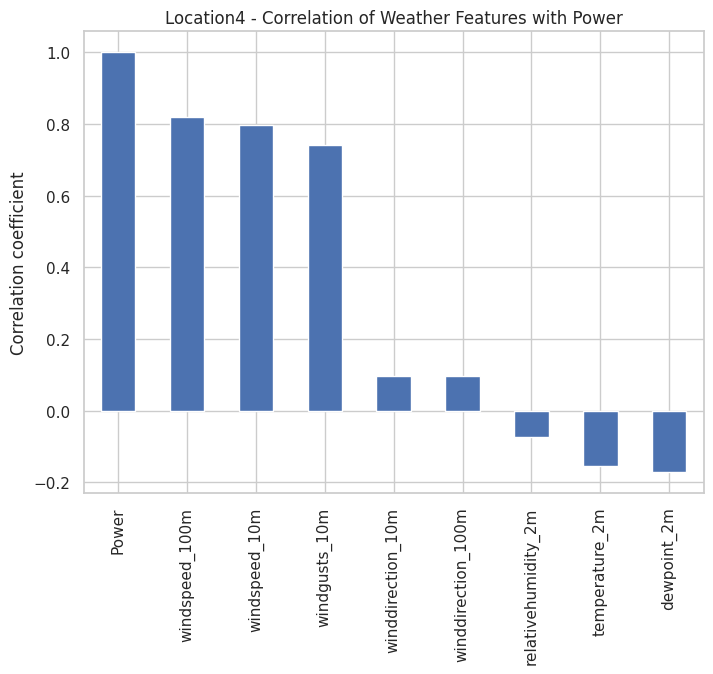

In [36]:
    # 4. Correlation with weather features
    corr = df.corr()['Power'].sort_values(ascending=False)
    plt.figure(figsize=(8,6))
    corr.plot(kind='bar')
    plt.title(f"{name} - Correlation of Weather Features with Power")
    plt.ylabel("Correlation coefficient")
    plt.show()